In [4]:
import sys; sys.path.append('..')
import numpy as np
from math import pi
import pyzx as zx
%config InlineBackend.figure_format = 'svg'

In [2]:
def Z_to_tensor(arity, phase):
    m = np.zeros([2]*arity, dtype = complex)
    m[(0,)*arity] = 1
    m[(1,)*arity] = np.exp(1j*phase)
    return m

def X_to_tensor(arity, phase):
    m = np.ones(2**arity, dtype = complex)
    for i in range(2**arity):
        if bin(i).count("1")%2 == 0: 
            m[i] += np.exp(1j*phase)
        else:
            m[i] -= np.exp(1j*phase)
    return np.power(np.sqrt(0.5),arity)*m.reshape([2]*arity)

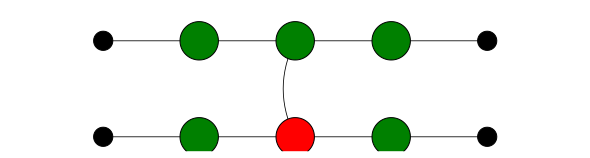

In [19]:
circ = zx.generate.cnots(2,1)
#zx.simplify.id_simp(circ)
zx.draw(circ)

In [23]:
g = circ.copy()
types = g.types()
phases = g.phases()
input_tensors = []
for i in g.inputs:
    n = list(g.neighbours(i))
    if len(n)!=1: raise TypeError("Weird input")
    v = n[0]
    phase = pi*phases[v]
    d = g.vertex_degree(v)
    input_tensors.append(Z_to_tensor(d,phase) if types[v] == 1 else X_to_tensor(d,phase))
np.outer(input_tensors[0],input_tensors[1])

array([[1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [26]:
z = Z_to_tensor(3,0)
x = X_to_tensor(3,0)
np.tensordot(z,x,axes=([1,1],))

ValueError: not enough values to unpack (expected 2, got 1)